<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021/2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 31/05/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


<b>Dados da pesquisa na base SCOPUS e PubMed - 436 documentos para análise</b>
<br>
Num | Artigo | Qtde
---|---|---
1 | Bom | 52
2 | Execelente | 16

Tabela de Artigos

<br>

**Feito**
1. [x] Enviar mail Metamap
1. [x] Criado projeto no git para Fork e acompanhamento do Will
1. [x] Nova forma de busca no PubMed, exemplo de query na ferramenta:
<br>
```
"natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract])
```
<br>
ao invés de 252, viria 159


**A Fazer**

1. [ ] 6+ - Há um documento que não foi necessário baixar PDF, verificar este
1. [ ] Ler Introduções de 70 documentos: Excelente (16) Bom (52)
1. [ ] Analisr biblioteca Python do Metamap
1. [ ] Reinstalar do zero o Metamap
1. [ ] Artigos sem abstract serão deixados por último


---

[Projeto no GitHub](https://github.com/LuizPerciliano/Evento-Adverso-com-Metamap-e-Twitter-com-Portugues-Brasil)

[Site da dissertação](https://www.overleaf.com/read/rtybccmfvfr7)

[Manual de instalação do Metamap DFB 2021](https://www.overleaf.com/read/jsyhtqwwgccz)

<h2> PESQUISA RECENTE - MAIO DE 2022 </h2>
<br>
((("natural language processing"AND ("adverse drug reaction"OR "adverse drug event"OR pharmacovigilance OR metamap))))
<br>
<b>Base SCOPUS antes = 458 | atual = 541 ()</b>
<br><br>
``` "natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract]) ```
<br>
<b>Base PUBMED antes = 252| atual = 289*. Com ajuste na string de busca ficou em 188 resultados</b>
<br><br>

<b>Dados da pesquisa na base SCOPUS e PubMed - 436 documentos para análise antes</b>
<br>
Num | Artigo | Qtde
---|---|---
1 | Bom | 52
2 | Execelente | 16

Tabela de Artigos

<br>

**Tarefas**
1. [ ] Atualizar projeto/programa de análise de artigos (.py)
1. [x] Enviar mail Metamap (Will, sem respostas há meses)
1. [ ] Atualizar projeto no git
1. [x] Implementar nova forma de busca no PubMed, exemplo de query na ferramenta:
<br>
```
"natural language processing"[Title/Abstract] AND ("adverse drug reaction"[Title/Abstract] OR "adverse drug event"[Title/Abstract] OR ("pharmacovigilance"[MeSH Terms] OR "pharmacovigilance"[Title/Abstract]) OR "metamap"[Title/Abstract])
```
<br>
ao invés de 252, viria 159
1. [ ] Analisar biblioteca Python do Metamap
1. [ ] Melhorar busca de massa de dados no Twitter com o Knime
1. [ ] Ajustar / rodar MetaMap com nova massa de dados
1. [ ] Artigos sem abstract serão deixados por último

---

# Preparar Infraesrtutura

In [25]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime
#import numpy as np
import seaborn as sns

import nltk
#nltk.download()
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

from google_trans_new import google_translator  

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(f'Iniciando o programa em: {data_inicio}')

Iniciando o programa em: 2022-06-01 00:20:55.592346


In [8]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'bases_filtradas_traduzida-02-05-2022.xlsx',
 'bases_filtradas_traduzida-26-09-2021.xlsx',
 'bases_filtradas_traduzida-27-06-2021.xlsx',
 'pubmed-csv-naturallan-set-2022.csv',
 'pubmed.csv',
 'PubMed_Timeline_Results_by_Year-10-06-2021.csv',
 'requiremets.txt',
 'resultado_pubmed.xlsx',
 'resultado_scopus-19-06-2021 - Copia.xlsx',
 'resultado_scopus-19-06-2021.xlsx',
 'scopus-12-06-2021-luciana.csv',
 'scopus-31-05-2022.csv',
 'scopus-94 - Copia.csv',
 'scopus-94-clean.csv',
 'scopus-94-clean.xlsx',
 'scopus-94.csv',
 'scopus.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

# Carga - Base Qualis

In [9]:
print('Carregando pesquisa realizada na base Scopus.')
'''
Fonte: https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/veiculoPublicacaoQualis/listaConsultaGeralPeriodicos.jsf
Periódico do quadriênio 2013-2016
'''
arquivo_base_qualis = os.path.join('../data','base-qualis-06-06-2021.xlsx')
raw_data_qualis = pd.read_excel(arquivo_base_qualis)
raw_data_qualis

Carregando pesquisa realizada na base Scopus.


,ISSN,Título,Área de Avaliação,Estrato
0,1981-030X,19&20 (RIO DE JANEIRO),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",C
1,2236-6695,A BARRIGUDA: REVISTA CIENTÍFICA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
2,1413-6090,A ECONOMIA EM REVISTA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
3,1516-3210,A&C. REVISTA DE DIREITO ADMINISTRATIVO & CONST...,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
4,0001-3072,ABACUS (SYDNEY. PRINT),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",A2
...,...,...,...,...
131269,1175-5326,ZOOTAXA (AUCKLAND. PRINT),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131270,1175-5334,ZOOTAXA (ONLINE),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131271,2358-3576,ZOOTECNIA,ZOOTECNIA / RECURSOS PESQUEIROS ...,C
131272,0798-7269,ZOOTECNIA TROPICAL - FONAIAP,ZOOTECNIA / RECURSOS PESQUEIROS ...,B3


# Carga - Base Scopus

In [14]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2022.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,NaN,NARHA,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R., Gonzalez G.",36069663700;36976315000;56596185000;56596524300;56749066000;,Pharmacovigilance from social media: Mining adverse drug reaction mentions using sequence labeli...,2015,Journal of the American Medical Informatics Association,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.",57113031900;7405652324;6701719661;7005833624;6508207735;7004471151;,Detecting adverse events using information technology,2003,Journal of the American Medical Informatics Association,10,2,NaN,115,128,...,NaN,JAMAF,12595401.0,English,J. Am. Med. Informatics Assoc.,Review,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0037353241
4,"Sarker A., Gonzalez G.",36976315000;56749066000;,Portable automatic text classification for adverse drug reaction detection via multi-corpus trai...,2015,Journal of Biomedical Informatics,53,NaN,NaN,196,207,...,NaN,JBIOB,25451103.0,English,J. Biomed. Informatics,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84924285421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,"Kim M.-Y., Dou Q., Zaiane O.R., Goebel R.",55839609700;36132938800;6602849837;7102516324;,Unsupervised mapping of sentences to biomedical concepts based on integrated information retriev...,2010,"2010 ACM International Conference on Bioinformatics and Computational Biology, ACM-BCB 2010",NaN,NaN,NaN,322,329,...,9781450304382,NaN,NaN,English,"ACM Int. Conf. Bioinformatics Comput. Biol., ACM-BCB",Conference Paper,Final,"All Open Access, Green",Scopus,2-s2.0-77958052050
537,"Ijaz A.Z., Song M., Lee D.",35302044400;35243608100;7406661433;,MKEM: A multi-level knowledge emergence model for mining undiscovered public knowledge,2009,"International Conference on Information and Knowledge Management, Proceedings",NaN,NaN,NaN,51,58,...,9781605588032,NaN,NaN,English,Int Conf Inf Knowledge Manage,Conference Paper,Final,NaN,Scopus,2-s2.0-74049100158
538,[No author name available],[No author id available],"Artificial Intelligence in Medicine - 12th Conference on Artificial Intelligence in Medicine, AI...",2009,Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence ...,5651 LNAI,NaN,NaN,NaN,NaN,...,3642029752; 9783642029752,NaN,NaN,English,Lect. Notes Comput. Sci.,Conference Review,Final,NaN,Scopus,2-s2.0-70350577030
539,"Kilbridge P.M., Noirot L.A., Reichley R.M., Heard K.M., Dunagan W.C., Bailey T.C.",6602546163;8298753200;6603460656;22034897300;7003952473;7201375998;,Computerized surveillance for adverse drug events in a pediatric hospital.,2008,AMIA ... Annual Symposium proceedings / AMIA Symposium. AMIA Symposium,NaN,NaN,NaN,1004,NaN,...,NaN,NaN,18998917.0,English,AMIA Annu Symp Proc,Article,Final,NaN,Scopus,2-s2.0-73949125371


In [15]:
print('Verificando tipos e se tem dados nulos')
raw_data_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        541 non-null    object 
 1   Author(s) ID                   541 non-null    object 
 2   Title                          541 non-null    object 
 3   Year                           541 non-null    int64  
 4   Source title                   541 non-null    object 
 5   Volume                         454 non-null    object 
 6   Issue                          236 non-null    object 
 7   Art. No.                       145 non-null    object 
 8   Page start                     407 non-null    object 
 9   Page end                       396 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       454 non-null    float64
 12  DOI        

In [16]:
raw_data_scopus.nunique()

Authors                          525
Author(s) ID                     521
Title                            539
Year                              23
Source title                     196
Volume                           188
Issue                             37
Art. No.                         141
Page start                       316
Page end                         325
Page count                         3
Cited by                          81
DOI                              442
Link                             541
Affiliations                     528
Authors with affiliations        536
Abstract                         530
Author Keywords                  375
Index Keywords                   492
Molecular Sequence Numbers         0
Chemicals/CAS                     85
Tradenames                        18
Manufacturers                      2
Funding Details                  259
Funding Text 1                   247
Funding Text 2                    29
Funding Text 3                     3
F

In [17]:
# verificar campos nulos
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            87
Issue                            305
Art. No.                         396
Page start                       134
Page end                         145
Page count                       538
Cited by                          87
DOI                               99
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  166
Index Keywords                    49
Molecular Sequence Numbers       541
Chemicals/CAS                    424
Tradenames                       521
Manufacturers                    539
Funding Details                  267
Funding Text 1                   293
Funding Text 2                   512
Funding Text 3                   538
F

In [18]:
# Copiar dataframe para ajustes
df_scopus = raw_data_scopus.copy()

In [19]:
## Verificar se os dataframes nao s"ao espelhos
print(id(df_scopus),id(raw_data_scopus))

2645538578224 2645545681008


In [20]:
# Ajustar de Colunas
'''
Em relação ao arquivo passado, foram incluídas as colunas:

'Funding Text 4','Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8','Funding Text 9',
'Funding Text 10'
'''

print('Verificar colunas')
df_scopus.columns

Verificar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [21]:
columns_scopus = {
    'Authors':'autores',
    'Author(s) ID':'id_autores',
    'Title':'titulo_artigo',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_artigo',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'Funding Text 4':'texto_financiamento_4',
    'Funding Text 5':'texto_financiamento_5',
    'Funding Text 6':'texto_financiamento_6',
    'Funding Text 7':'texto_financiamento_7',
    'Funding Text 8':'texto_financiamento_8',
    'Funding Text 9':'texto_financiamento_9',
    'Funding Text 10':'texto_financiamento_10',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [28]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(25)

,autores,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,inicio_pagina_,fim_pagina_
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.,2001,Proceedings / AMIA ... Annual Symposium. AMIA Symposium,NaN,NaN,NaN,17,21,...,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429,17,21
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522,D1075,D1079
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R., Gonzalez G.",36069663700;36976315000;56596185000;56596524300;56749066000;,Pharmacovigilance from social media: Mining adverse drug reaction mentions using sequence labeli...,2015,Journal of the American Medical Informatics Association,22,3,NaN,671,681,...,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705,671,681
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D., Pizzifferri L., Hripcsak G.",57113031900;7405652324;6701719661;7005833624;6508207735;7004471151;,Detecting adverse events using information technology,2003,Journal of the American Medical Informatics Association,10,2,NaN,115,128,...,12595401.0,English,J. Am. Med. Informatics Assoc.,Review,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0037353241,115,128
4,"Sarker A., Gonzalez G.",36976315000;56749066000;,Portable automatic text classification for adverse drug reaction detection via multi-corpus trai...,2015,Journal of Biomedical Informatics,53,NaN,NaN,196,207,...,25451103.0,English,J. Biomed. Informatics,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84924285421,196,207
5,"Wang X., Hripcsak G., Markatou M., Friedman C.",57221484326;7004471151;6603214614;16682051600;,"Active Computerized Pharmacovigilance Using Natural Language Processing, Statistics, and Electro...",2009,Journal of the American Medical Informatics Association,16,3,NaN,328,337,...,19261932.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-65349157361,328,337
6,"Freifeld C.C., Brownstein J.S., Menone C.M., Bao W., Filice R., Kass-Hout T., Dasgupta N.",23570607100;8872411400;55843197100;56181778000;22979170300;12806117900;16743514400;,Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter,2014,Drug Safety,37,5,NaN,343,350,...,24777653.0,English,Drug Saf.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84901857191,343,350
7,"Herrero-Zazo M., Segura-Bedmar I., Martínez P., Declerck T.",55813646600;35303400800;7202906176;22333556000;,The DDI corpus: An annotated corpus with pharmacological substances and drug-drug interactions,2013,Journal of Biomedical Informatics,46,5,NaN,914,920,...,23906817.0,English,J. Biomed. Informatics,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-84883756903,914,920
8,"Bian J., Topaloglu U., Yu F.",7103200005;24478069800;55509784700;,Towards large-scale twitter mining for drug-related adverse events,2012,"International Conference on Information and Knowledge Management, Proceedings",NaN,NaN,NaN,25,32,...,NaN,English,Int Conf Inf Knowledge Manage,Conference Paper,Final,"All Open Access, Green",Scopus,2-s2.0-84870431352,25,32
9,"Harpaz R., Callahan A., Tamang S., Low Y., Odgers D., Finlayson S., Jung K., LePendu P., Shah N.H.",8964766400;16548985200;8919124500;57220470187;57189462825;56329287300;13607618300;13605247200;74...,"Text Mining for Adverse Drug Events: the Promise, Challenges, and State of the Art",2014,Drug Safety,37,10,NaN,777,790,...,25151493.0,English,Drug Saf.,Article,Final,"All Open Access, Gr

In [23]:
# Ajustar Colunas de Páginas
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [26]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

In [30]:
df_scopus.loc[df_scopus['eid'] == "2-s2.0-84979503522"] [['issn_scopus','inicio_pagina','fim_pagina']]

,issn_scopus,inicio_pagina,fim_pagina
1,03051048,D1075,D1079


In [31]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas']]

,inicio_pagina,fim_pagina,quantidade_paginas
0,17,21,NaN
1,D1075,D1079,NaN
2,671,681,NaN
513,420,446,NaN


In [32]:
## Criar novas colunas de paginas e + uma para calcular qtde paginas
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

In [33]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_']]

,inicio_pagina,fim_pagina,quantidade_paginas,inicio_pagina_,fim_pagina_
0,17,21,NaN,17,21
1,D1075,D1079,NaN,1075,1079
2,671,681,NaN,671,681
513,420,446,NaN,420,446


In [34]:
print('Ajustar tipagem dos dados')
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

Ajustar tipagem dos dados


In [35]:
df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']

In [36]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_']]

,inicio_pagina,fim_pagina,quantidade_paginas,inicio_pagina_,fim_pagina_,quantidade_paginas_
0,17,21,NaN,17.0,21.0,4.0
1,D1075,D1079,NaN,1075.0,1079.0,4.0
2,671,681,NaN,671.0,681.0,10.0
513,420,446,NaN,420.0,446.0,26.0


In [37]:
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
242,22132198,9349.0
56,22132198,6696.0
292,NaN,263.0
518,03029743,131.0
513,18650929,26.0
...,...,...
531,16130073,NaN
534,16130073,NaN
538,03029743,NaN
539,1942597X,NaN


In [38]:
# tratar data - criar novo campo de data
df_scopus['data_conferencia']

0                                          NaN
1                                          NaN
2                                          NaN
3                                          NaN
4                                          NaN
                        ...                   
536        2 August 2010 through 4 August 2010
537    2 November 2009 through 6 November 2009
538          18 July 2009 through 22 July 2009
539                                        NaN
540                                        NaN
Name: data_conferencia, Length: 541, dtype: object

In [39]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')

Ajustar tipagem dos dados


In [41]:
#Analisar dataframe tratado
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 57 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores                      541 non-null    object  
 1   id_autores                   541 non-null    object  
 2   titulo_artigo                541 non-null    object  
 3   ano                          541 non-null    int64   
 4   titulo_fonte                 541 non-null    object  
 5   volume                       454 non-null    object  
 6   publicado                    236 non-null    object  
 7   numero_artigo                145 non-null    object  
 8   inicio_pagina                407 non-null    object  
 9   fim_pagina                   396 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          454 non-null    float64 
 12  doi                      

In [42]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_scopus.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,541.000000,3.000000,454.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151.000000,3.290000e+02,407.000000,396.000000,396.000000
mean,2016.147874,651.000000,24.984581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,143626.596026,2.729355e+07,523.142506,561.934343,49.146465
std,4.450171,762.055772,74.734156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40753.473850,5.562027e+06,652.420827,890.719829,576.765563
min,1992.000000,11.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70370.000000,1.504394e+06,1.000000,2.000000,1.000000
25%,2014.000000,229.500000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116944.000000,2.392062e+07,111.000000,117.750000,4.000000
50%,2017.000000,448.000000,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134151.000000,2.837183e+07,328.000000,326.500000,7.000000
75%,2020.000000,971.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172950.000000,3.158466e+07,709.500000,686.500000,9.000000
max,2022.000000,1494.000000,1339.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,274699.000000,3.557981e+07,6093.000000,10381.000000,9349.000000


In [43]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_scopus['titulo_artigo'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


319

## Visualizações

In [44]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Bronze, Green', 'All Open Access, Green', 'All Open Access, Bronze', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze', 'All Open Access, Bronze, Green', 'All Open Access, Gold', 'All Open Access, Gold, Green', 'All Open Access, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Hybrid Gold, Green']

In [45]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe().head()

ano                                          \
                               count         mean       std     min      25%   
acesso_livre                                                                   
All Open Access, Bronze         24.0  2015.833333  4.390372  2003.0  2014.75   
All Open Access, Bronze, Green  54.0  2014.759259  3.801366  2003.0  2012.25   
All Open Access, Gold            9.0  2020.444444  1.130388  2019.0  2020.00   
All Open Access, Gold, Green    83.0  2018.072289  3.392183  2006.0  2017.00   
All Open Access, Green          47.0  2017.340426  3.760646  2005.0  2016.00   

                                                       quantidade_paginas  \
                                   50%     75%     max              count   
acesso_livre                                                                
All Open Access, Bronze         2016.5  2019.0  2021.0                0.0   
All Open Access, Bronze, Green  2014.5  2018.0  2021.0                0.0   
All Open Access, Gold           2020.0  2021.0  2022.0                0.0   
All Open Access, Gold, Green    2018.0  2021.0  2022.0                0.0   
All Open Access, Green          2019.0  2020.0  2022.0                0.0   

                                     ... fim_pagina_           \
                               mean  ...         75%      max   
acesso_livre                         ...                        
All Open Access, Bronze         NaN  ...      398.00   1953.0   
All Open Access, Bronze, Green  NaN  ...      882.25   1582.0   
All Open Access, Gold           NaN  ...     1417.00   2123.0   
All Open Access, Gold, Green    NaN  ...      844.25   1079.0   
All Open Access, Green          NaN  ...      797.75  10381.0   

                               quantidade_paginas_                           \
                                             count        mean          std   
acesso_livre                                                                  
All Open Access, Bronze                       19.0    9.842105     4.072443   
All Open Access, Bronze, Green                48.0    7.687500     3.748227   
All Open Access, Gold                          3.0    9.000000     3.464102   
All Open Access, Gold, Green                   4.0    7.500000     4.725816   
All Open Access, Green                        44.0  373.000000  1712.622659   

                                                                
                                min   25%   50%    75%     max  
acesso_livre                                                    
All Open Access, Bronze         3.0  7.00  10.0  12.00    18.0  
All Open Access, Bronze, Green  2.0  5.75   7.0   9.00    17.0  
All Open Access, Gold           5.0  8.00  11.0  11.00    11.0  
All Open Access, Gold, Green    4.0  4.00   6.0   9.50    14.0  
All Open Access, Green          1.0  7.00   8.0  10.25  9349.0  

[5 rows x 128 columns]

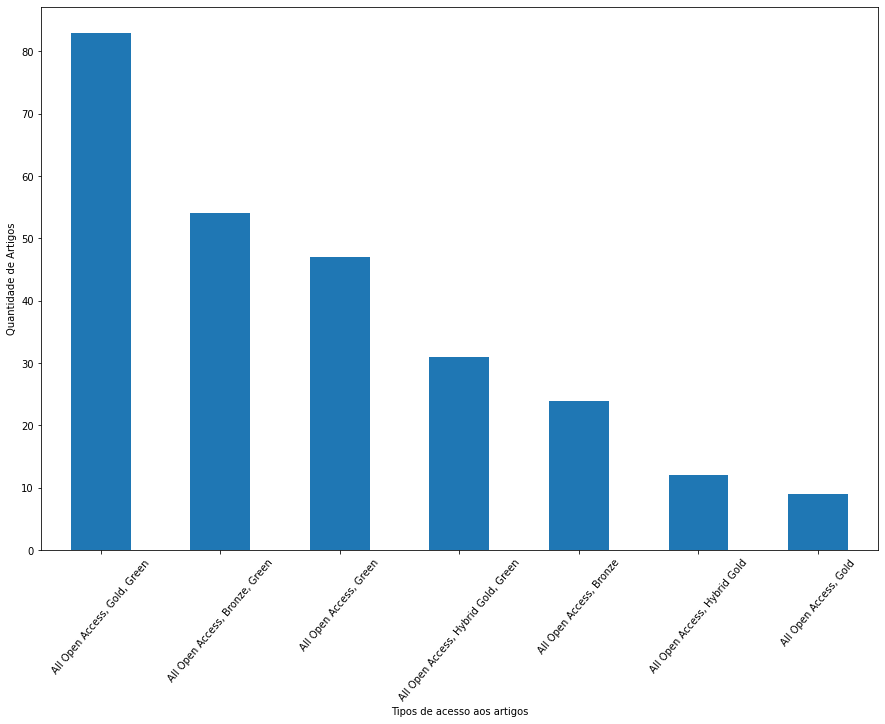

In [46]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos artigos")
plt.ylabel("Quantidade de Artigos")
plt.show()

In [47]:
# Analisando tipos de documentos
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe().head()

ano                                                 \
                   count         mean       std     min     25%     50%   
tipo_documento                                                            
Article            329.0  2016.179331  4.861628  1992.0  2014.0  2017.0   
Book                 1.0  2014.000000       NaN  2014.0  2014.0  2014.0   
Book Chapter         8.0  2017.500000  2.878492  2013.0  2015.5  2018.5   
Conference Paper   164.0  2015.731707  3.589517  2005.0  2013.0  2016.0   
Conference Review    3.0  2015.333333  5.686241  2009.0  2013.0  2017.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2020.00  2022.0                0.0    NaN  ...      775.25   
Book               2014.00  2014.0                0.0    NaN  ...      264.00   
Book Chapter       2019.25  2021.0                0.0    NaN  ...      792.25   
Conference Paper   2018.25  2022.0                1.0   11.0  ...      563.00   
Conference Review  2018.50  2020.0                2.0  971.0  ...      132.00   

                           quantidade_paginas_                                 \
                       max               count        mean         std    min   
tipo_documento                                                                  
Article            10381.0               216.0   82.675926  779.929255    1.0   
Book                 264.0                 1.0  263.000000         NaN  263.0   
Book Chapter        1111.0                 8.0   11.625000    8.331309    1.0   
Conference Paper    6096.0               143.0    6.384615    3.416866    1.0   
Conference Review    132.0                 1.0  131.000000         NaN  131.0   

                                                  
                      25%    50%     75%     max  
tipo_documento                                    
Article              6.00    8.0   10.00  9349.0  
Book               263.00  263.0  263.00   263.0  
Book Chapter         6.25   10.0   16.25    24.0  
Conference Paper     4.00    5.0    9.00    26.0  
Conference Review  131.00  131.0  131.00   131.0  

[5 rows x 128 columns]

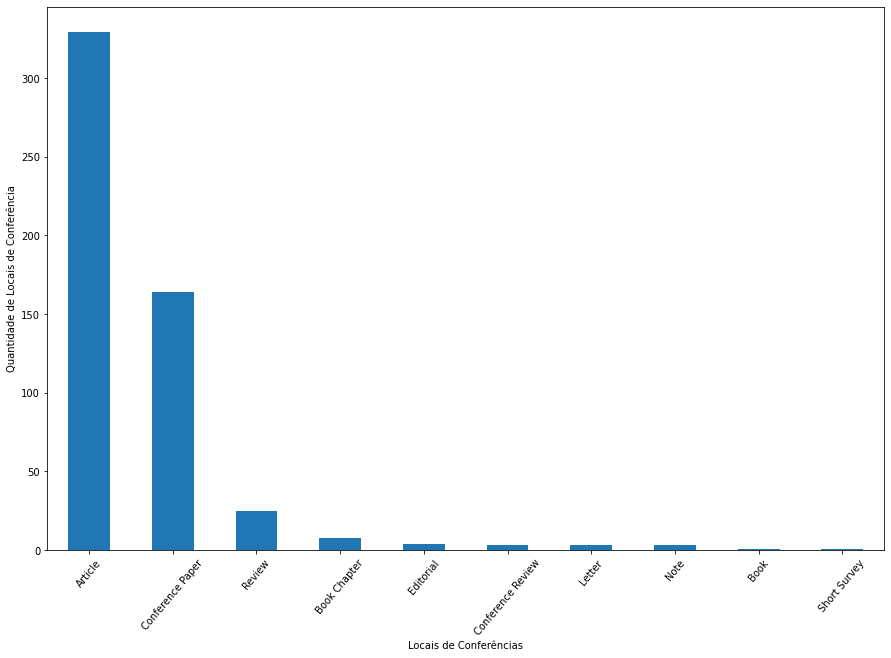

In [48]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

In [50]:
# Analisando Locais de Conferencia¶
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe()

ano                                                       \
                  count    mean  std     min     25%     50%     75%     max   
local_conferencia                                                              
Amsterdam           1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Boston, MA          1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Brisbane, QLD       1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Copenhagen          4.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
Daejeon             1.0  2008.0  NaN  2008.0  2008.0  2008.0  2008.0  2008.0   
Dallas, TX          1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Gaithersburg, MD    1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Geneva              1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0   
Hangzhou            1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Hong Kong           1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
Huelva              1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Jeju                1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Maastricht          1.0  2006.0  NaN  2006.0  2006.0  2006.0  2006.0  2006.0   
Maui, HI            1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Niagara Falls, NY   1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Niagara Falls, ON   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Oslo                1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Perth               1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Philadelphia, PA    1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Pisa                2.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
Porto               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Saarbrucken         1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
San Diego, CA       1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
San Francisco, CA   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Singapore           1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Turin               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Verona              2.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   
Wshington, DC       1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   

                  quantidade_paginas         ... fim_pagina_         \
                               count   mean  ...         75%    max   
local_conferencia                            ...                      
Amsterdam                        0.0    NaN  ...      246.00  246.0   
Arlington, VA                    0.0    NaN  ...      496.00  496.0   
Boston, MA                       0.0    NaN  ...       77.00   77.0   
Brisbane, QLD                    0.0    NaN  ...      549.00  549.0   
Copenhagen                       0.0    NaN  ...      628.50  686.0   
Daejeon                          0.0    NaN  ...      353.00  353.0   
Dallas, TX                       0.0    NaN  ...      280.00  280.0   
Gaithersburg, MD                 1.0   11.0  ...         NaN    NaN   
Geneva                           0.0    NaN  ...      828.00  828.0   
Hangzhou                         0.0    NaN  ...      443.00  443.0   
Hong Kong                        0.0    NaN  ...       58.00   58.0   
Huelva                           0.0    NaN  ...       74.00   74.0   
Jeju                             0.0    NaN  ...       29.00   29.0   
Maastricht                       0.0    NaN  ...      844.00  844.0   
Maui, HI                         0.0    NaN  ...       32.00   32.0   
Niagara Falls, NY                0.0    NaN  ...      329.00  329.0   
Niagara Falls, ON                0.0    NaN  ...      947.00  947.0   
Oslo                             0.0   

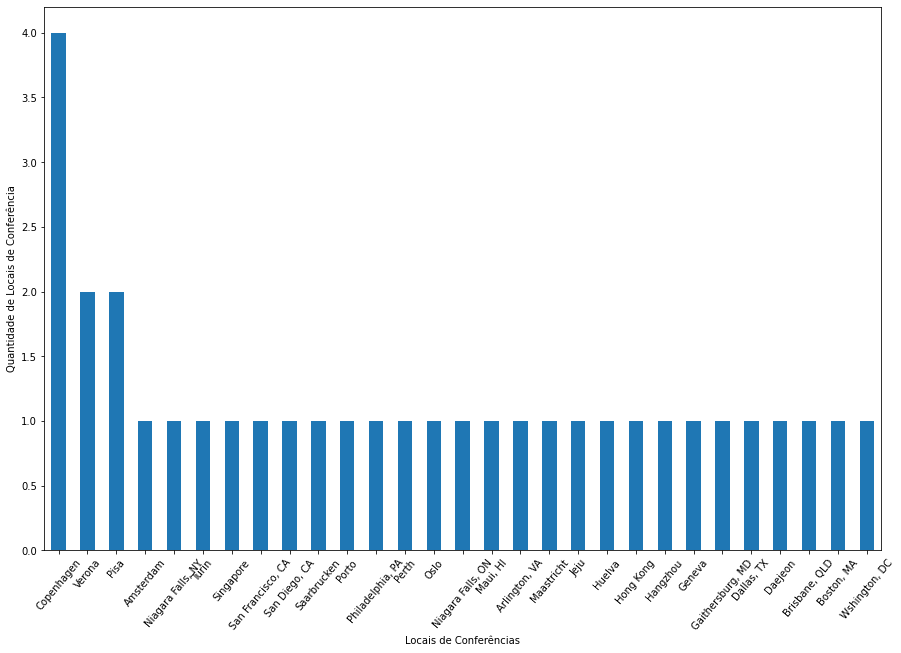

In [51]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

In [54]:
#Analisando Editores
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 42.0  2016.976190   
Adis                                                 5.0  2020.600000   
American Academy of Allergy, Asthma and Immunology   3.0  2019.333333   
American College of Physicians                       1.0  2017.000000   
American Society of Clinical Oncology                2.0  2020.000000   
...                                                  ...          ...   
Weston Medical Publishing                            1.0  2015.000000   
Wiley-Blackwell Publishing Ltd                       1.0  2018.000000   
World Scientific Publishing Co. Pte Ltd              3.0  2016.666667   
Wuhan University                                     1.0  2016.000000   
eLife Sciences Publications Ltd                      1.0  2017.000000   

                                                                              \
                                                         std     min     25%   
editor                                                                         
Academic Press Inc.                                 3.338527  2003.0  2015.0   
Adis                                                1.140175  2019.0  2020.0   
American Academy of Allergy, Asthma and Immunology  2.081666  2017.0  2018.5   
American College of Physicians                           NaN  2017.0  2017.0   
American Society of Clinical Oncology               0.000000  2020.0  2020.0   
...                                                      ...     ...     ...   
Weston Medical Publishing                                NaN  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                           NaN  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             1.154701  2016.0  2016.0   
Wuhan University                                         NaN  2016.0  2016.0   
eLife Sciences Publications Ltd                          NaN  2017.0  2017.0   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2022.0   
Adis                                                2021.0  2021.0  2022.0   
American Academy of Allergy, Asthma and Immunology  2020.0  2020.5  2021.0   
American College of Physicians                      2017.0  2017.0  2017.0   
American Society of Clinical Oncology               2020.0  2020.0  2020.0   
...                                                    ...     ...     ...   
Weston Medical Publishing                           2015.0  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                      2018.0  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             2016.0  2017.0  2018.0   
Wuhan University                                    2016.0  2016.0  2016.0   
eLife Sciences Publications Ltd                     2017.0  2017.0  2017.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   
...                                                               ...  ...   
Weston Medical Publishing                                         0.0  NaN   
Wiley-Blackwell Publishing Ltd      

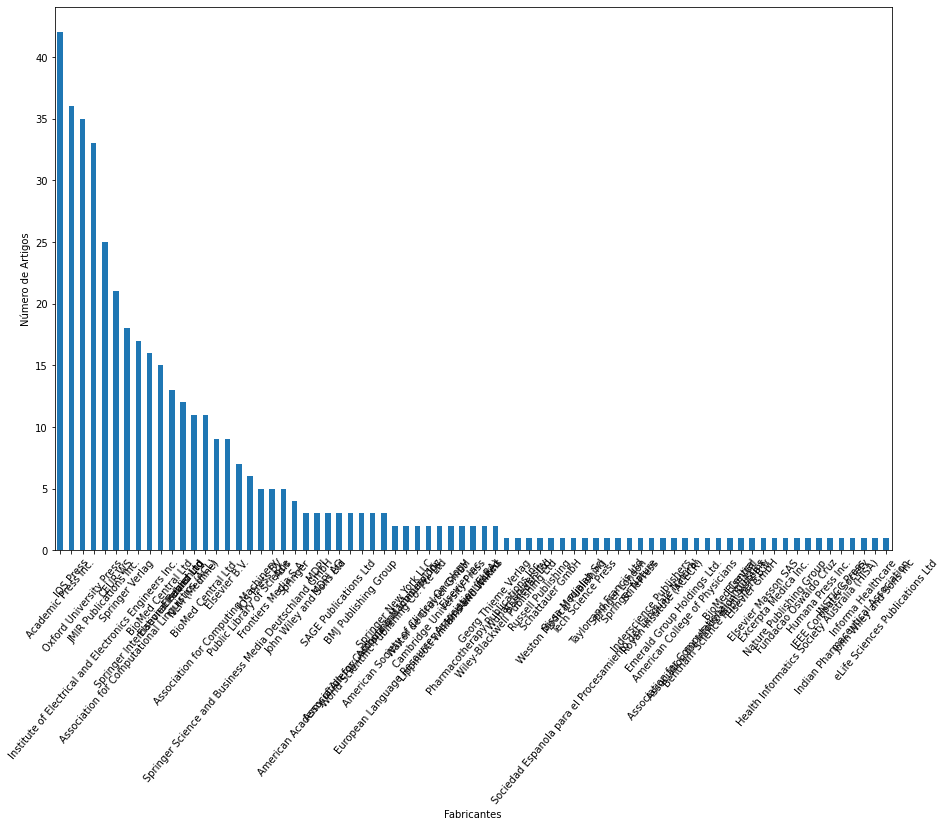

In [55]:
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Fabricantes")
plt.ylabel("Número de Artigos")
plt.show()

In [57]:
# Analisando artigos por Ano¶
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe()

quantidade_paginas                                                      \
                  count    mean std     min     25%     50%     75%     max   
ano                                                                           
1992                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2000                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2001                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2003                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2004                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2005                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2006                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2007                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2008                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2009                1.0   448.0 NaN   448.0   448.0   448.0   448.0   448.0   
2010                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2011                1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
2012                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2013                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2014                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2015                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2016                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2017                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2018                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2019                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2020                1.0  1494.0 NaN  1494.0  1494.0  1494.0  1494.0  1494.0   
2021                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2022                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   

     quantidade_citacoes               ... fim_pagina_           \
                   count         mean  ...         75%      max   
ano                                    ...                        
1992                 1.0    30.000000  ...      896.00    896.0   
2000                 1.0    22.000000  ...      153.00    153.0   
2001                 1.0  1339.000000  ...       21.00     21.0   
2003                 3.0   138.000000  ...      437.00    533.0   
2004                 4.0    13.500000  ...      578.00    767.0   
2005                 5.0    14.800000  ...     1137.50   2066.0   
2006                 6.0    38.666667  ...      678.00    844.0   
2007                 4.0     9.750000  ...      397.50    549.0   
2008                10.0    24.700000  ...      620.50    691.0   
2009                 7.0    47.428571  ...      365.50   2083.0   
2010                16.0    23.750000  ...      608.50    913.0   
2011                15.0    35.133333  ...      758.00   1279.0   
2012                18.0    29.555556  ...     1003.00   1582.0   
2013                26.0    22.384615  ...      725.75    961.0   
2014                32.0    29.906250  ...      657.75   1069.0   
2015                40.0    38.125000  ...      431.75   1788.0   
2016                28.0    38.107143  ...      534.50   2028.0   
2017                49.0    22.734694  ...      688.00   7433.0   
2018                50.0    15.320000  ...      733.50   4809.0   
2019                53.0    11.981132  ...      839.00   6096.0   
2020                48.0     8.104167  ...      697.25  10381.0   
2021                34.0     2.411765  ...      908.50   3020.0   
2022                 3.0     1.333333  ...     1170.00   2123.0   

     quantidade_paginas_                                                     \
                   count        mean          std   min    25%   50%    75%   
ano                                              

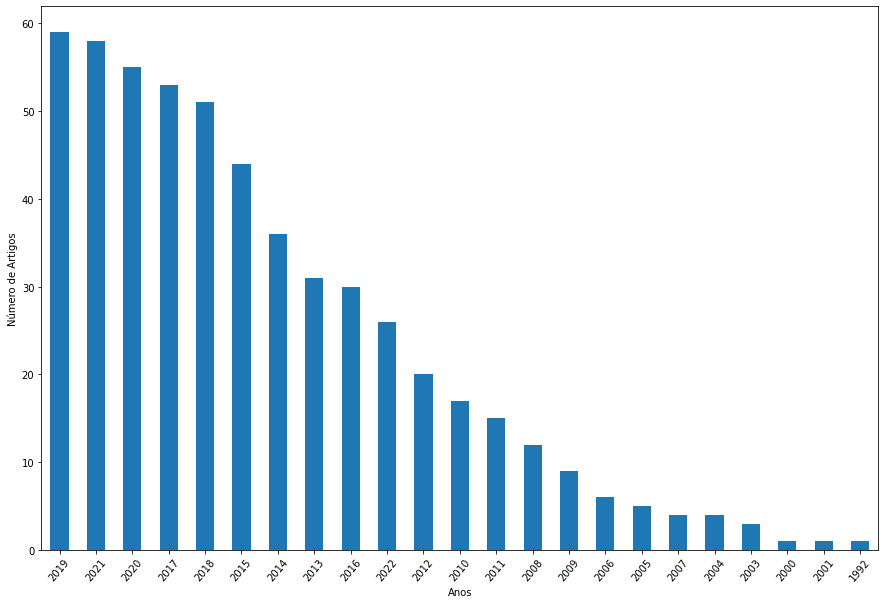

In [58]:
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Artigos")
plt.show()

In [59]:
# Analisando os idiomas
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          539.0  2016.153989  4.452187  1992.0  2014.0  2017.0  2020.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas         ... fim_pagina_           \
                    max              count   mean  ...         75%      max   
idioma_original                                    ...                        
English          2022.0                3.0  651.0  ...       687.5  10381.0   
French           2011.0                0.0    NaN  ...       161.0    161.0   
Spanish          2018.0                0.0    NaN  ...        36.0     36.0   

                quantidade_paginas_                                         \
                              count       mean         std  min   25%  50%   
idioma_original                                                              
English                       394.0  49.375635  578.222279  1.0  4.25  7.0   
French                          1.0   3.000000         NaN  3.0  3.00  3.0   
Spanish                         1.0   5.000000         NaN  5.0  5.00  5.0   

                              
                 75%     max  
idioma_original               
English          9.0  9349.0  
French           3.0     3.0  
Spanish          5.0     5.0  

[3 rows x 128 columns]

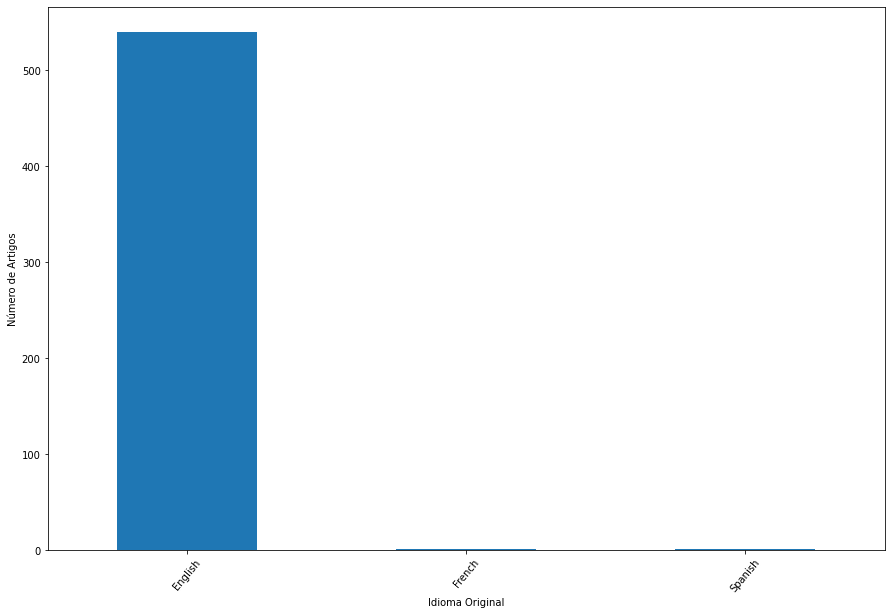

In [60]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Artigos")
plt.show()

Visão geral em gráfico


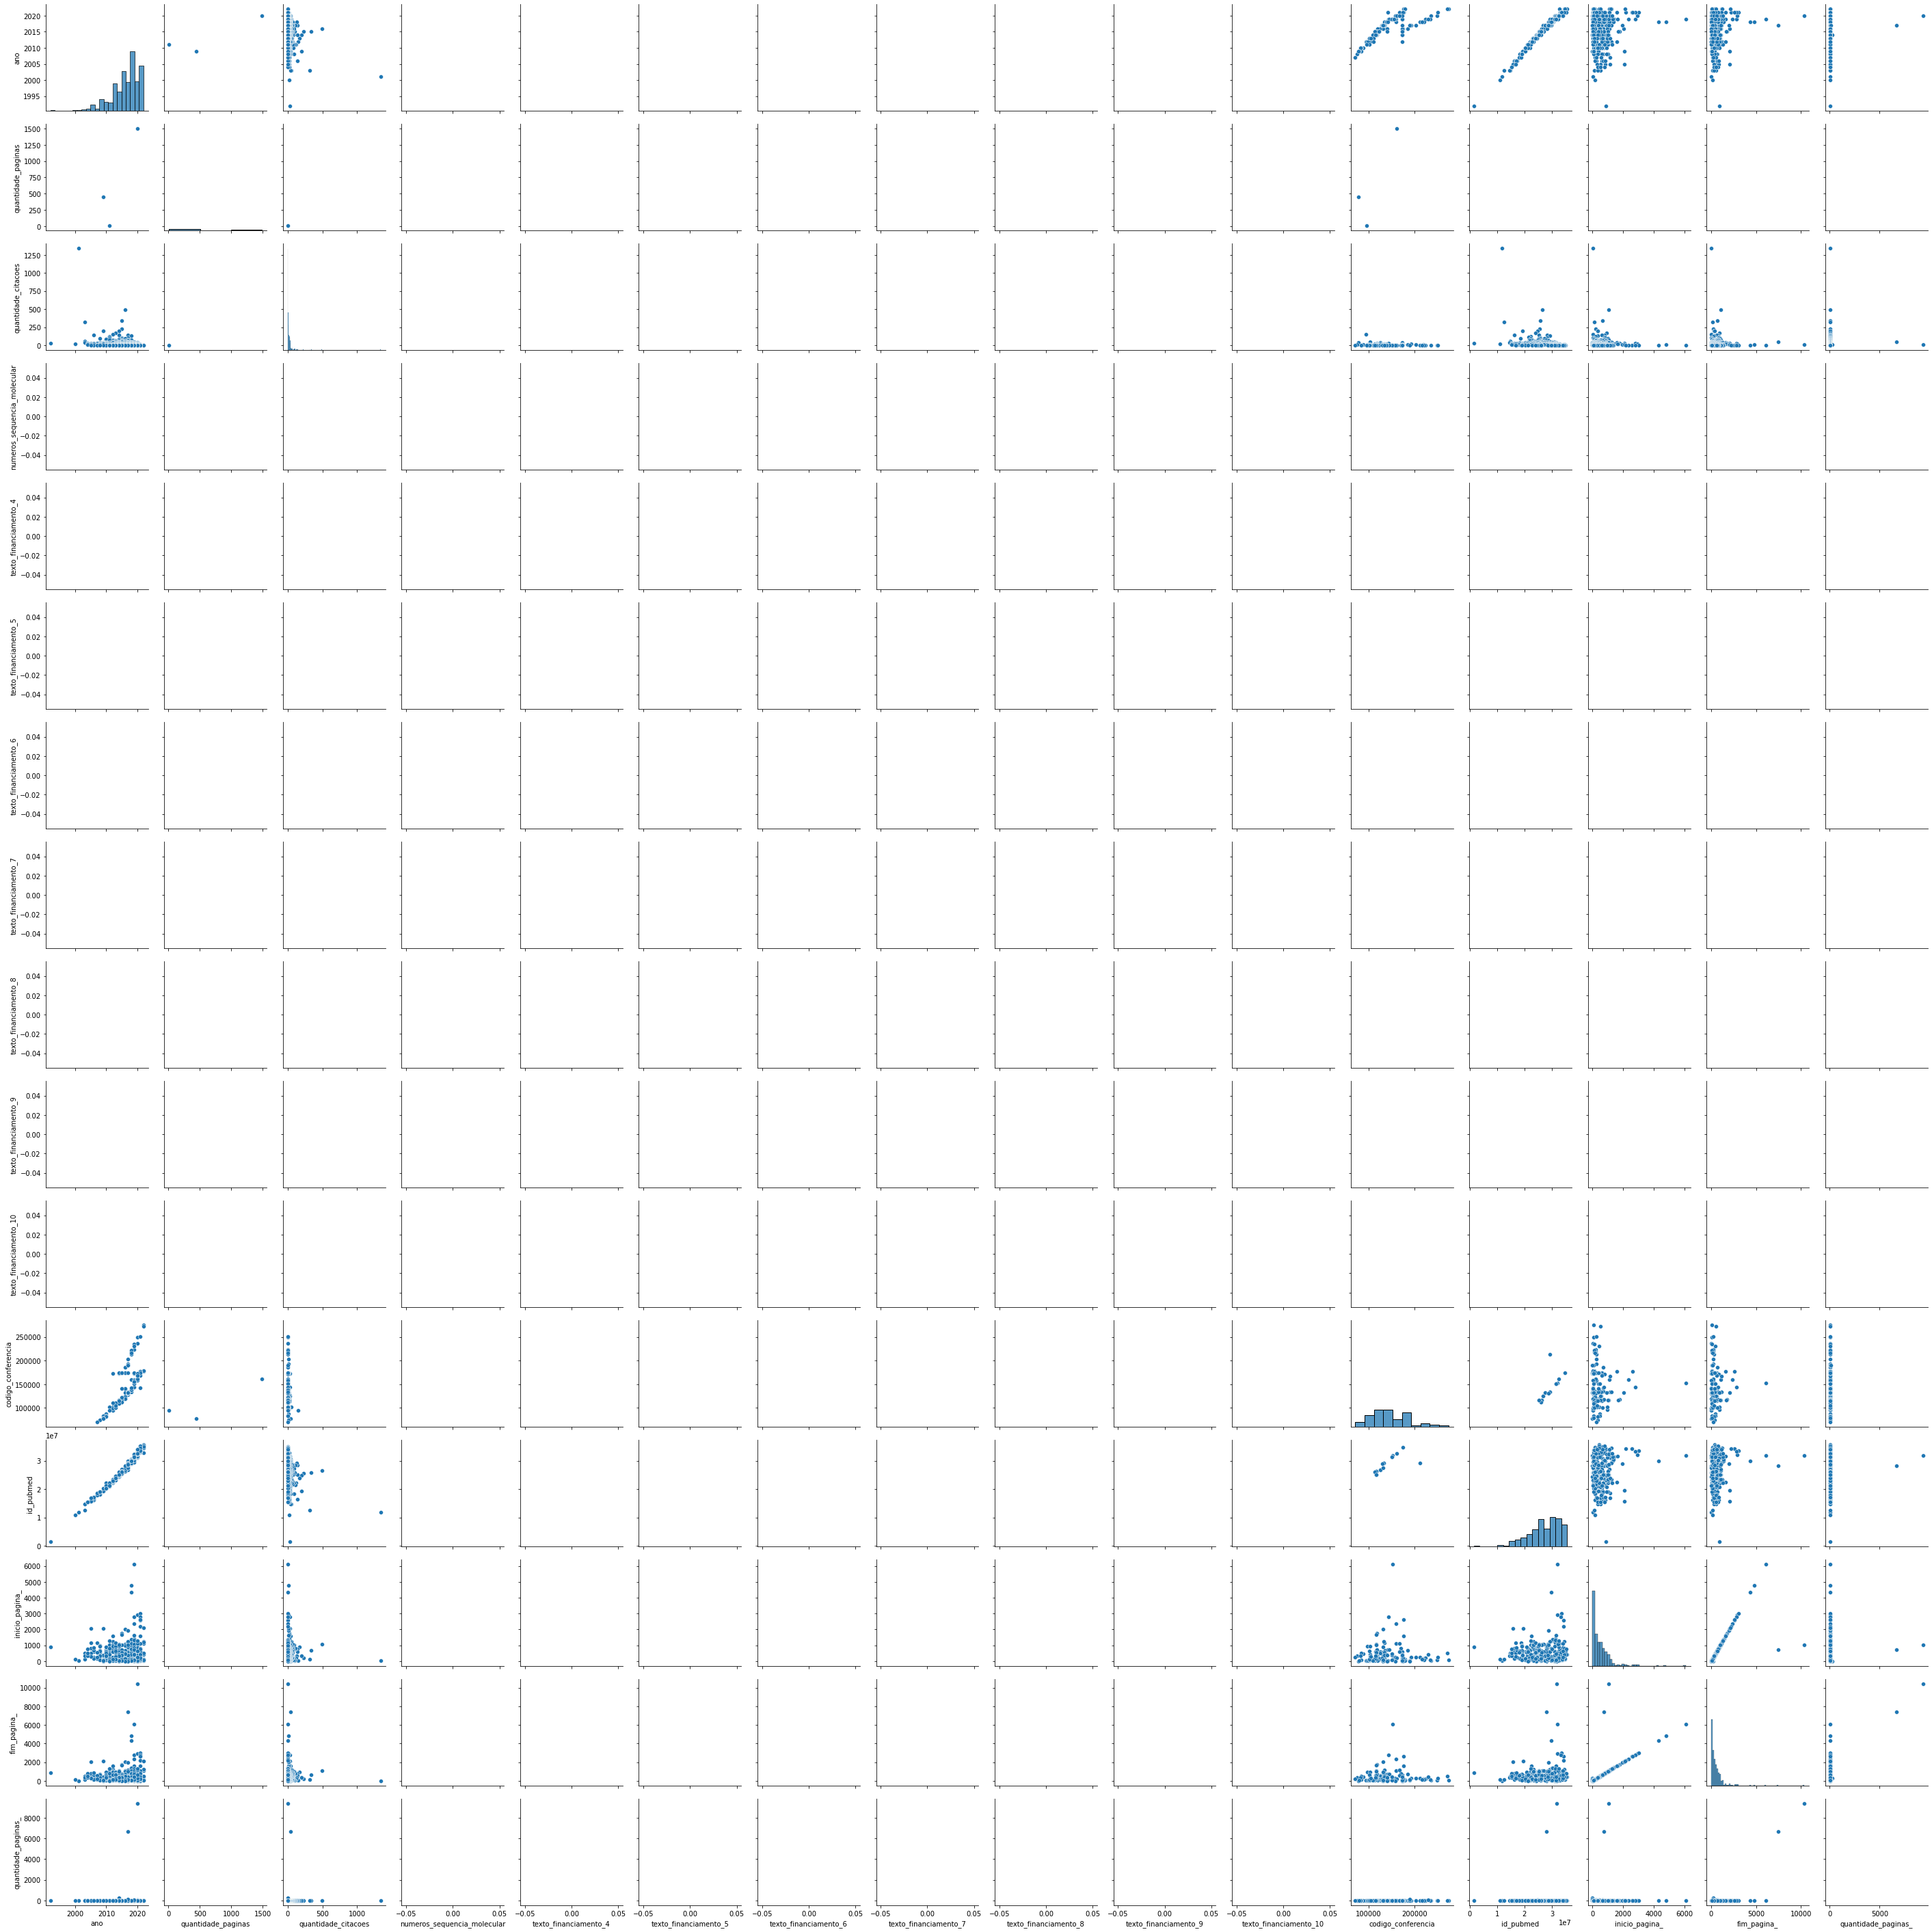

In [61]:
print('Visão geral em gráfico')
sns.pairplot(df_scopus)

### Nuvem de Palavras dos Títulos

In [2]:
import nltk
#nltk.download() ## demorando muito, ver o q isso tá fazendo
from nltk.corpus import stopwords

#stopwords = stopwords.words('english')

print(stopwords)

# apend outras palavras

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'o

In [3]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
#df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
palavras_titulo = df_scopus['titulo_artigo'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


NameError: name 'df_scopus' is not defined

In [ ]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

In [ ]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é{type(wordcloud_palavras_titulo)}')

In [ ]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

In [ ]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_titulo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras dos Resumos

In [ ]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

In [ ]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

In [ ]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

In [ ]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

In [ ]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud_resumo'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

In [ ]:
df_scopus.columns

In [ ]:
# Exportação do resultado para Excel

In [ ]:
## Gerar planilha com colunas especificas
resultado_geral = os.path.join('../data','scopus-06-06-2022.csv')

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_artigo', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus,index=False, encoding='utf-8', header=True)

# Carga - Base PubMed

# Preparar e carregar base de dados

## Carregar Planilha - Documentos para o Trabalho Relacioandos

In [7]:
trabalhos_relacionados_traduzido = os.path.join('../data','bases_filtradas_traduzida-27-06-2021.xlsx')
raw_data = pd.read_excel(trabalhos_relacionados_traduzido)
raw_data

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_scopus_traduzido,titulo_artigo_pubmed,titulo_artigo_pubmed_traduzido,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,...,conceituar_NLP,conceituar_outros,observacao,status_resumo,data_leitura_resumo,data_leitura_completa,sincronizado_mendely,nota_artigo,artigo_leitura,artigo_referencia_dissertacao
0,22195162.0,1942597X,pattern mining for extraction of mentions of a...,Pattern mining for extraction of mentions of A...,Mineração de padrão para extração de menções d...,NaN,macho,2011.0,88.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0
1,NaN,03029743,a large scale cnn ensemble for medication safe...,A large-scale CNN ensemble for medication safe...,Um conjunto CNN em grande escala para análise ...,NaN,macho,2017.0,14.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-06-26 00:00:00,NaN,0.0,NaN,0,0
2,NaN,NaN,towards large scale twitter mining for drug re...,Towards large-scale twitter mining for drug-re...,Em direção a mineração de mineração de grandes...,NaN,macho,2012.0,132.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0
3,23304375.0,1942597X,a comparative study of current clinical natura...,A comparative study of current Clinical Natura...,Um estudo comparativo dos sistemas atuais de p...,NaN,macho,2012.0,46.0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,20688192.0,15320464,a comparison of machine learning techniques fo...,A comparison of machine learning techniques fo...,Uma comparação de técnicas de aprendizagem de ...,NaN,macho,2010.0,10.0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31863657.0,NaN,adverse drug reaction detection in social medi...,NaN,macho,Adverse Drug Reaction Detection in Social Medi...,Detecção adversa da reação medicamentosa em mí...,NaN,1.0,0,...,0,NaN,Entra ou ñ para leitura: sim,Bom,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
432,31896797.0,NaN,pgxcorpus a manually annotated corpus for phar...,NaN,macho,"PGxCorpus, a manually annotated corpus for pha...","Pgxcorpus, um corpus anotado manualmente para ...",NaN,4.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
433,32477654.0,NaN,normalizing adverse events using recurrent neu...,NaN,macho,Normalizing Adverse Events using Recurrent Neu...,Normalizando eventos adversos usando redes neu...,NaN,0.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
434,33718782.0,NaN,impact of pharmacogenomic information on value...,NaN,macho,Impact of Pharmacogenomic Information on Value...,Impacto de informações farmacogenômicas sobre ...,NaN,0.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0


## Analisar dados brutos original

### Analisando base

In [6]:
pd.set_option("max_colwidth", 200)

In [8]:
print('Verificando tipos e se tem dados nulos')
raw_data.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 90 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   id_pubmed                                         287 non-null    float64
 1   issn_scopus                                       378 non-null    object 
 2   titulo_artigo                                     436 non-null    object 
 3   titulo_artigo_scopus                              420 non-null    object 
 4   titulo_artigo_scopus_traduzido                    436 non-null    object 
 5   titulo_artigo_pubmed                              16 non-null     object 
 6   titulo_artigo_pubmed_traduzido                    436 non-null    object 
 7   ano_publicacao_scopus                             420 non-null    float64
 8   quantidade_citacoes                               372 non-nul

In [9]:
raw_data.leitura_resumo.nunique()

2

In [10]:
raw_data.nunique()

id_pubmed                         286
issn_scopus                       102
titulo_artigo                     436
titulo_artigo_scopus              420
titulo_artigo_scopus_traduzido    421
                                 ... 
data_leitura_completa               0
sincronizado_mendely                2
nota_artigo                         0
artigo_leitura                      1
artigo_referencia_dissertacao       1
Length: 90, dtype: int64

In [11]:
# verificar campos nulos
raw_data.isnull().sum()

id_pubmed                         149
issn_scopus                        58
titulo_artigo                       0
titulo_artigo_scopus               16
titulo_artigo_scopus_traduzido      0
                                 ... 
data_leitura_completa             436
sincronizado_mendely              279
nota_artigo                       436
artigo_leitura                      0
artigo_referencia_dissertacao       0
Length: 90, dtype: int64

## Copiar dataframe para ajustes

In [12]:
## Verificar se os dataframes nao s"ao espelhos
df_trab_relacionados = raw_data.copy()

print(id(df_trab_relacionados))

1952752403792


## Traduzindo resumos PUBMED

In [13]:
df_pubmed = df_trab_relacionados.query('fonte=="pubmed"')

In [4]:
# https://stackoverflow.com/questions/68270026/python-google-trans-new-throwing-error-on-code-that-was-working

from bs4 import BeautifulSoup
from bs4.formatter import HTMLFormatter
from googletrans import Translator
import requests

translator = Translator()

ModuleNotFoundError: No module named 'googletrans'

In [18]:
%%time
translator = google_translator()  
df_pubmed['resumo_traduzido_google_translator']=df_pubmed['resumo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

JSONDecodeError: Extra data: line 1 column 3725 (char 3724)

## Analisar dataframe tratado

In [19]:
display(df_trab_relacionados)

,id_pubmed,issn_scopus,titulo_artigo,titulo_artigo_scopus,titulo_artigo_scopus_traduzido,titulo_artigo_pubmed,titulo_artigo_pubmed_traduzido,ano_publicacao_scopus,quantidade_citacoes,documentos_6+,...,conceituar_NLP,conceituar_outros,observacao,status_resumo,data_leitura_resumo,data_leitura_completa,sincronizado_mendely,nota_artigo,artigo_leitura,artigo_referencia_dissertacao
0,22195162.0,1942597X,pattern mining for extraction of mentions of a...,Pattern mining for extraction of mentions of A...,Mineração de padrão para extração de menções d...,NaN,macho,2011.0,88.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0
1,NaN,03029743,a large scale cnn ensemble for medication safe...,A large-scale CNN ensemble for medication safe...,Um conjunto CNN em grande escala para análise ...,NaN,macho,2017.0,14.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-06-26 00:00:00,NaN,0.0,NaN,0,0
2,NaN,NaN,towards large scale twitter mining for drug re...,Towards large-scale twitter mining for drug-re...,Em direção a mineração de mineração de grandes...,NaN,macho,2012.0,132.0,0,...,0,0.0,Entra ou ñ para leitura: sim,Bom,NaN,NaN,0.0,NaN,0,0
3,23304375.0,1942597X,a comparative study of current clinical natura...,A comparative study of current Clinical Natura...,Um estudo comparativo dos sistemas atuais de p...,NaN,macho,2012.0,46.0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
4,20688192.0,15320464,a comparison of machine learning techniques fo...,A comparison of machine learning techniques fo...,Uma comparação de técnicas de aprendizagem de ...,NaN,macho,2010.0,10.0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,31863657.0,NaN,adverse drug reaction detection in social medi...,NaN,macho,Adverse Drug Reaction Detection in Social Medi...,Detecção adversa da reação medicamentosa em mí...,NaN,1.0,0,...,0,NaN,Entra ou ñ para leitura: sim,Bom,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
432,31896797.0,NaN,pgxcorpus a manually annotated corpus for phar...,NaN,macho,"PGxCorpus, a manually annotated corpus for pha...","Pgxcorpus, um corpus anotado manualmente para ...",NaN,4.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
433,32477654.0,NaN,normalizing adverse events using recurrent neu...,NaN,macho,Normalizing Adverse Events using Recurrent Neu...,Normalizando eventos adversos usando redes neu...,NaN,0.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0
434,33718782.0,NaN,impact of pharmacogenomic information on value...,NaN,macho,Impact of Pharmacogenomic Information on Value...,Impacto de informações farmacogenômicas sobre ...,NaN,0.0,0,...,0,NaN,Entra ou ñ para leitura: não,Ruim,2021-07-02 00:00:00,NaN,NaN,NaN,0,0


# Visualizações

## Leitura das Introduções

**Obervações**
<br>
- 06+ = 5 separados para leitura dos resumos, ordenado do mais antigo para o mais novo
    1 tinha 3 páginas e não foi possível baixar o pdf para analisar:
    <br>"Structuring Clinical Decision Support Rules for Drug Safety Using Natural Language Processing"
    
    <br>

In [20]:
# Groupby by
leitura_resumo = df_trab_relacionados.groupby("leitura_resumo")

# Summary statistic of all
leitura_resumo.describe().head()

id_pubmed                                                      \
                   count          mean           std         min         25%   
leitura_resumo                                                                 
0                  140.0  2.264679e+07  4.927874e+06   1504394.0  18999236.5   
1                  147.0  3.003208e+07  2.387929e+06  22195162.0  28540757.0   

                                                   ano_publicacao_scopus  \
                       50%         75%         max                 count   
leitura_resumo                                                             
0               23264026.5  25842740.5  34111555.0                 176.0   
1               30409350.0  31737162.5  33936461.0                 244.0   

                             ... artigo_leitura       \
                       mean  ...            75%  max   
leitura_resumo               ...                       
0               2011.494318  ...            0.0  0.0   
1               2018.159836  ...            0.0  0.0   

               artigo_referencia_dissertacao                                \
                                       count mean  std  min  25%  50%  75%   
leitura_resumo                                                               
0                                      191.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                                      245.0  0.0  0.0  0.0  0.0  0.0  0.0   

                     
                max  
leitura_resumo       
0               0.0  
1               0.0  

[2 rows x 184 columns]

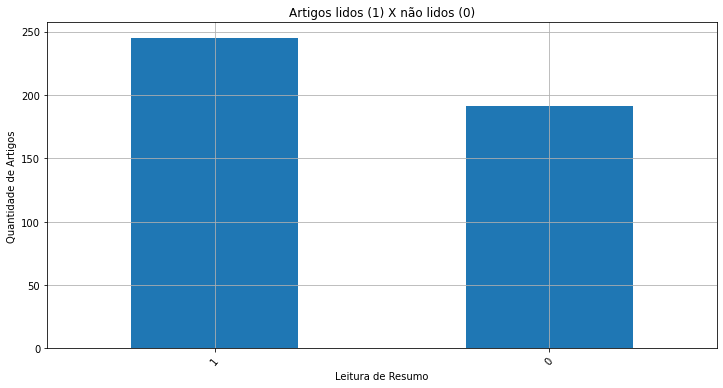

In [21]:
# colocar leganda 0 nao lido e 1 lido
plt.figure(figsize=(12,6))
plt.title("Artigos lidos (1) X não lidos (0)")

leitura_resumo.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Leitura de Resumo")
plt.ylabel("Quantidade de Artigos")
#lt.legend()
plt.grid()
plt.show()

In [15]:
## Dos separadas para ler, quais sao bons, execelentes e razoáveis

In [22]:
# Groupby by
status_resumo = df_trab_relacionados.groupby("status_resumo")

# Summary statistic of all
status_resumo.describe().head()

id_pubmed                                                       \
                  count          mean           std         min          25%   
status_resumo                                                                  
Bom                34.0  2.953572e+07  3.012043e+06  22195162.0  27458077.00   
Excelente           9.0  3.045433e+07  3.219760e+06  24777653.0  28643174.00   
Razoavel           22.0  2.782170e+07  3.734880e+06  15802475.0  26058858.25   
Ruim               98.0  3.046476e+07  2.047518e+06  20841741.0  29135046.50   

                                                   ano_publicacao_scopus  \
                      50%          75%         max                 count   
status_resumo                                                              
Bom            29857113.0  31805258.50  34111555.0                  49.0   
Excelente      31546016.0  32552728.00  33684612.0                  15.0   
Razoavel       28245488.5  29846252.75  33380331.0                  41.0   
Ruim           31081428.5  31792635.50  33936461.0                 140.0   

                            ... artigo_leitura       \
                      mean  ...            75%  max   
status_resumo               ...                       
Bom            2017.081633  ...            0.0  0.0   
Excelente      2018.466667  ...            0.0  0.0   
Razoavel       2017.268293  ...            0.0  0.0   
Ruim           2018.735714  ...            0.0  0.0   

              artigo_referencia_dissertacao                                     
                                      count mean  std  min  25%  50%  75%  max  
status_resumo                                                                   
Bom                                    52.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Excelente                              16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Razoavel                               42.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Ruim                                  151.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[4 rows x 192 columns]

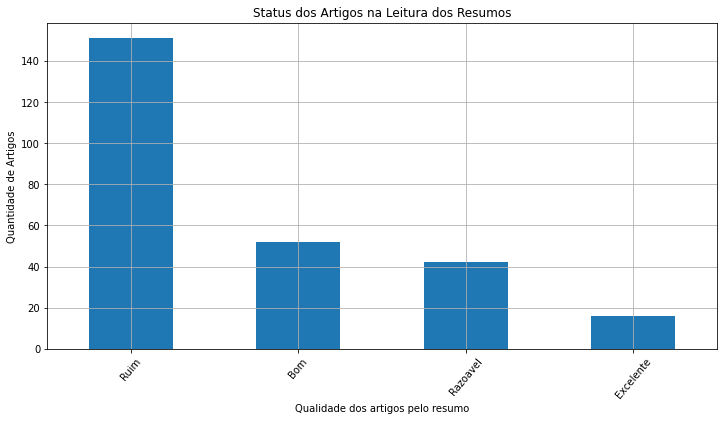

In [23]:
plt.figure(figsize=(12,6))
status_resumo.size().sort_values(ascending=False).plot.bar()
plt.title("Status dos Artigos na Leitura dos Resumos")
plt.xticks(rotation=50)
plt.xlabel("Qualidade dos artigos pelo resumo")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

In [24]:
df_trab_relacionados['data_leitura_resumo'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

In [25]:
s = pd.Series(pd.to_datetime('today'))

In [26]:
print(f'percentual do ano em que estamos')
s.dt.dayofyear / 365

percentual do ano em que estamos


0    0.413699
dtype: float64

# Artigos que podem entrar e nao entrou

- Pharmacovigilance in the era of social media: Discovering adverse drug events cross-relating Twitter and PubMed 
<br>(ao pesquisar   TITLE-ABS-KEY ( mining  AND for  AND adverse  AND drug  AND events  AND on  AND twitter ) ) = 28 resultados
- Detection of adverse drug reaction from twitter data
    - e outros com a query acima
- SSEL-ADE: A semi-supervised ensemble learning framework for extracting adverse drug events from social media, mesmo autor de um artigo interessante da pesquisa ()
- Adaptation of algorithms for medical information retrieval for working on russian-language text content



# Curiosidades

# Exportação do resultado para Excel

## Planilhas

In [27]:
df_trab_relacionados.columns

Index(['id_pubmed', 'issn_scopus', 'titulo_artigo', 'titulo_artigo_scopus',
       'titulo_artigo_scopus_traduzido', 'titulo_artigo_pubmed',
       'titulo_artigo_pubmed_traduzido', 'ano_publicacao_scopus',
       'quantidade_citacoes', 'documentos_6+', 'documentos_94+', 'fonte',
       'jornal_book_pubmed', 'autores_pubmed', 'ano_publicacao_pubmed',
       'idioma_original', 'tipo_documento', 'pdf_baixado', 'acesso_livre',
       'autores_scopus', 'titulo_fonte', 'volume', 'publicado',
       'numero_artigo', 'doi', 'doi_scopus', 'doi_pubmed', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'nomes_comerciais',
       'fabricantes', 'quimica', 'detalhes_financiamento',
       'texto_financiamento_1', 'texto_financiamento_2',
       'texto_financiamento_3', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia', 'isbn',
       'coden', 'titulo_abreviad

# Tempo de Execução do trabalho

In [28]:
data_fim = pd.Timestamp.now()
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}' )

Programa iniciado em: 2022-05-31 23:31:37.459415, e terminado em 2022-05-31 23:39:33.870250


In [29]:
print(f'Shape da planinha: {df_trab_relacionados.shape}')

Shape da planinha: (436, 90)


# Cria arquivo requirements para nova instalação